In [22]:
import numpy as np
from numpy import random
import pandas as pd
from scipy import stats
import math as m

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [23]:
#exercise1
t_dim = 3.052 * 61.04       #from minutes to seconds
tau = t_dim * m.log(2)      #from half-lieve time to tau=const dec
print(tau)

129.1292163070089


Text(0, 0.5, 'number of atoms')

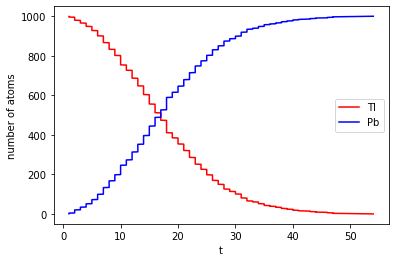

In [24]:
#1st method

def probdec(t,tau):
    return (1-2**(-t/tau))

thallium=1000
lead=0
data=[]
for t in range(1,1000):
    for i in range(thallium): 
        pdecay=random.random()
        if pdecay<probdec(t,tau):
            thallium-=1
            lead+=1
            data.append([t,thallium,lead])
            
df = pd.DataFrame(data)
df
plt.plot(df[0],df[1], 'r-', label='Tl')
plt.plot(df[0],df[2], 'b-', label='Pb')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('number of atoms')

In [25]:
t=np.arange(1000)
#plt.plot(t,probdec(t,tau))

(0.0, 1000.0, 0.0, 0.006)

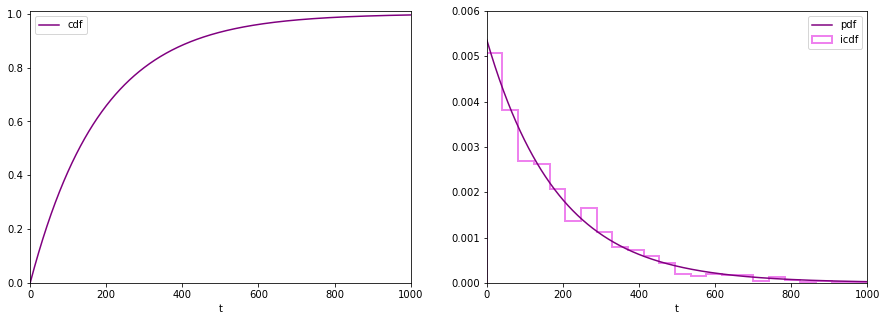

In [31]:
#2nd method: inverse transform method

# prob func
def pdf(t,tau):
    return (m.log(2)/tau)*2**(-t/tau)

# cum func
def cdf(t,tau):
    return (1 - 2**(-t/tau))

# inv cum func
def icdf(z,tau):
    return -tau * m.log2(1-z)

u = np.random.random(1000)
v = [icdf(i,tau) for i in u]

# plot
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(t, cdf(t,tau), label='cdf', color='purple')
ax1.set_xlabel('t')
ax1.legend(loc='best')
ax1.axis([0,1000,0,1.01])

ax2.plot(t, pdf(t,tau), label='pdf', color='purple')
ax2.hist(v, histtype='step', bins='auto', density=True, linewidth=2, label='icdf', color='violet')
ax2.set_xlabel('t')
ax2.legend(loc='best')
ax2.axis([0,1000,0,0.006])


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [27]:
#exercise2
random.seed(2020)
n = 10**6

# group all the constants so: tan(theta/2) = const/b
Z = 79                          # gold atom
e = 1.602 * 10**(-19)           # electric charge
e0 = 8.854 * 10**(-12)          # vacuum permittivity
E = (7.7 * 10**6)*e             # V, or in J: E = 1.2337 * 10**-12

const = (Z*e**2)/(2*np.pi*e0*E)

# 2D gaussian beam:
a0 = 5.291 * 10**(-11)          # Bohr radius
sigma = a0/100
mean = [0,0]
cov = [[sigma**2,0],[0,sigma**2]]
gauss = random.multivariate_normal(mean,cov,n)

# asking for the particles with a theta > np.pi/2
# set the condition: 0 < b/const < 1
# ->  np.abs(b) < const
count = 0
for i in range(n):
    b = (np.sqrt(gauss[:,0][i]**2+gauss[:,1][i]**2))
    if (np.abs(b)<const):
        count += 1
    
print('the fraction of bounced back particles is:',count*100/n, '%')

the fraction of bounced back particles is: 0.1528 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

result with the hit or miss method: 1.4498
error = 0.009538870478206528
result with the mean value method: 1.4444556051324298
error = 0.005336270914508254


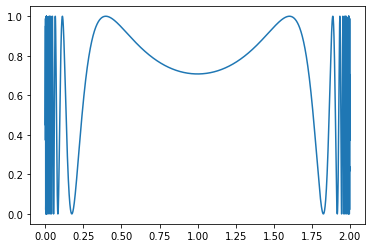

In [28]:
#exercise3
N = 10000
X = np.linspace(0.001,1.999,N)

def func(x):
    return (np.sin(1/(x*(2-x))))**2

plt.plot(X, func(X))

#with the hit/miss method:
count = 0
for i in range(N):
    Y = np.random.random()
    if Y < func(X[i]): 
        count += 1
#        plt.scatter(X[i],Y)   #to see the accepted points

I=2*count/N
print('result with the hit or miss method:',I)
err1 = (0.6745*(2-0)**0.5)/(N)**0.5
print('error =',err1)

#with the mean value method:
count = 0
values = []
for i in range(N):
    x = 2*np.random.random()
    values.append(func(x))
    count += func(x)  

I = 2*count/N
print('result with the mean value method:',I)
err2 = np.std(values)*(2-0)/(N)**0.5
print('error =', err2)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [29]:
#exercise4
generated_points=100000

#circle
points_inside = 0
for i in range(generated_points):
    point = np.random.uniform(-1, 1, 2)     #inside a square, points of dim=2
    dist = np.linalg.norm(point)                
    if dist<1:
        points_inside += 1
area = 2**2 *(points_inside/generated_points)
print('the area of the circle is:', area)

#10D sphere
points_inside = 0
for i in range(generated_points):
    point = np.random.uniform(-1, 1, 10)     #inside a 'square', points of dim=10
    dist = np.linalg.norm(point)                
    if dist<1:
        points_inside += 1
volume = 2**10 *(points_inside/generated_points)
print('the volume of a 10D-sphere is:', volume)

the area of the circle is: 3.13784
the volume of a 10D-sphere is: 2.7136


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [30]:
#exercise5
N = 1000
X = np.linspace(0.00001, 0.99999, N)  #x generated from ]0,1[

def f(x):
    return x**(-0.5)/((m.e**x) + 1)

def w(x):
    return (1/x)**0.5   

#integral of w(x), from 0 to 1:
integral = 0
for x in X:
    integral += w(x)
    
int_norm = integral/N                 #value of the integral of w(x), nomalized to N

#integral I with importance sampling method:
count = 0
for x in X:
    count += f(x)/w(x)
    
I = (1/N)*count*int_norm
print('I =',I)

I = 0.8616622974951778
